# **MUSHROOM CLASSIFICATION**

## **Introduction**

The **Mushroom Dataset** is designed to classify mushrooms as **edible or poisonous** based on their various attributes. Through **Exploratory Data Analysis (EDA)**, we aim to understand the structure of the data, identify important features, and prepare the dataset for predictive modeling.



###  **Objectives of EDA**
1. **Understanding Data Structure:**
   - Inspecting the dataset’s size, structure, and data types.
   - Identifying categorical and numerical features.

2. **Handling Missing Values & Duplicates:**
   - Checking for missing values and their proportion.
   - Identifying and removing duplicate entries if present.

3. **Data Distribution & Summary Statistics:**
   - Analyzing the frequency distribution of categorical features.
   - Summarizing dataset statistics to understand feature characteristics.

4. **Categorical Feature Analysis:**
   - Visualizing categorical features using bar plots and count plots.
   - Comparing feature distributions between edible and poisonous mushrooms.

5. **Feature Correlation Analysis:**
   - Identifying relationships between features and the target variable (`class` - edible/poisonous).

6. **Categorical Feature Encoding:**
   - Preparing categorical features for modeling using techniques like **Label Encoding** or **One-Hot Encoding**.

7. **Data Preparation:**
   - Creating a clean, transformed dataset ready for model training and evaluation.





###  **Outcome of EDA:**
The EDA process will produce a **well-prepared dataset**, ready for building reliable and accurate machine learning models for mushroom classification.



### **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### **Importing dataset**

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects/mushroom_cleaned.csv')

### **Analysing top 10 data**

In [3]:
df.head(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


### **Checking information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


### **Renaming Columns**

In [5]:
df.columns = df.columns.str.replace('-', '_')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap_diameter     54035 non-null  int64  
 1   cap_shape        54035 non-null  int64  
 2   gill_attachment  54035 non-null  int64  
 3   gill_color       54035 non-null  int64  
 4   stem_height      54035 non-null  float64
 5   stem_width       54035 non-null  int64  
 6   stem_color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


### **Checking null values**

In [7]:
df.isna().sum()

,0
cap_diameter,0
cap_shape,0
gill_attachment,0
gill_color,0
stem_height,0
stem_width,0
stem_color,0
season,0
class,0


### **Checking duplicate rows**

In [8]:
df.duplicated().sum()

303

In [9]:
df.drop_duplicates(inplace=True)

### **Boxplot**

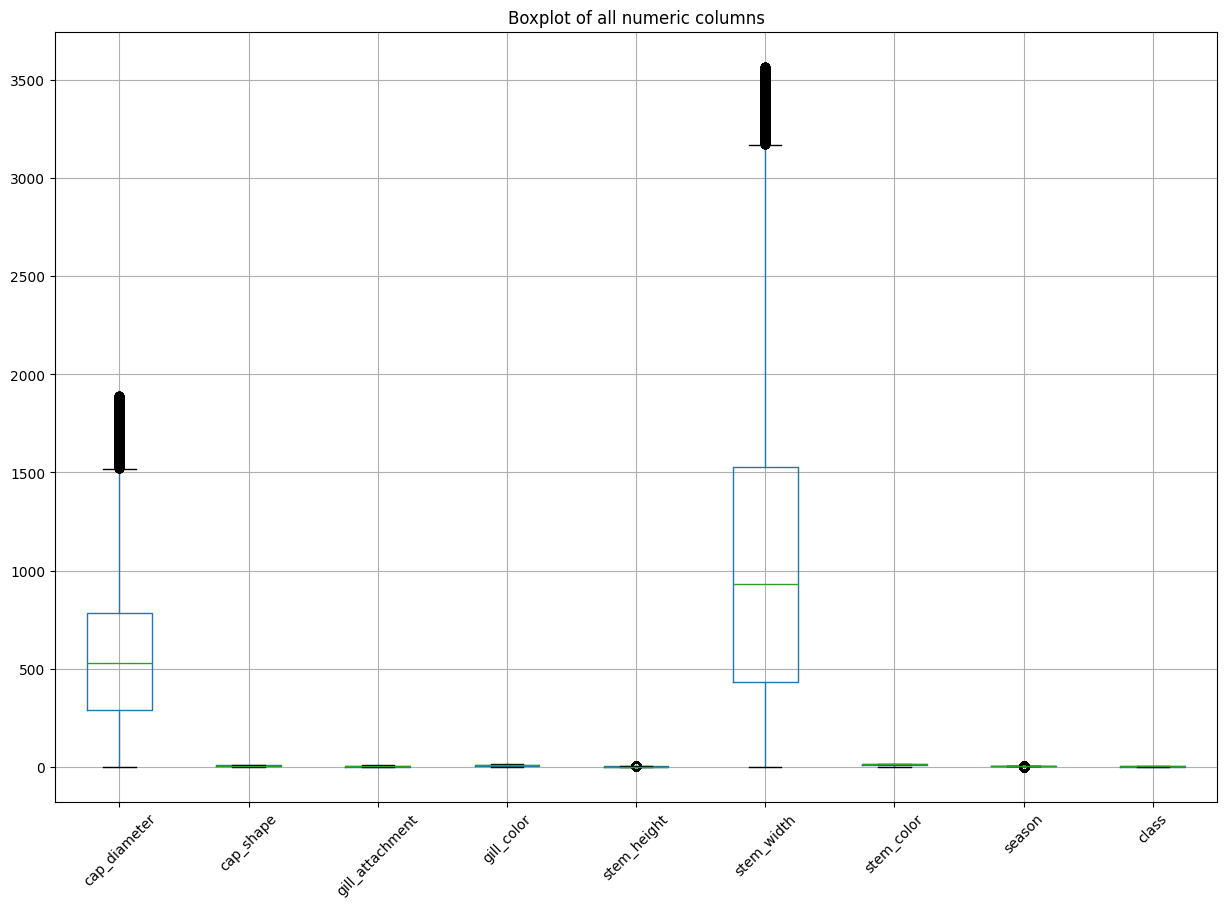

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
df[numeric_cols].boxplot()
plt.title('Boxplot of all numeric columns')
plt.xticks(rotation=45)
plt.show()

### **Removing outliers using InterQuartile Range**

In [11]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for i in df.select_dtypes(include=['number']).columns:
    df = remove_outliers_iqr(df, i)

## **Statistical Analysis**

### Covariance

In [12]:
df.cov(numeric_only=True)

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
cap_diameter,107103.692840,158.911758,174.158179,175.818884,12.340606,191260.489614,101.890819,0.415922,-32.008610
cap_shape,158.911758,4.626677,0.122921,0.911419,0.045179,387.732351,0.246651,0.001728,-0.154561
gill_attachment,174.158179,0.122921,5.115311,0.899053,-0.136645,422.478847,0.309344,0.001742,-0.083843
gill_color,175.818884,0.911419,0.899053,9.951373,0.012568,232.615600,1.889316,-0.000465,-0.115532
stem_height,12.340606,0.045179,-0.136645,0.012568,0.258841,16.078826,-0.028727,0.000113,0.050911
stem_width,191260.489614,387.732351,422.478847,232.615600,16.078826,487962.057941,309.563978,1.057625,-73.336813
stem_color,101.890819,0.246651,0.309344,1.889316,-0.028727,309.563978,10.772290,0.000921,-0.182893
season,0.415922,0.001728,0.001742,-0.000465,0.000113,1.057625,0.000921,0.000733,-0.000360
class,-32.008610,-0.154561,-0.083843,-0.115532,0.050911,-73.336813,-0.182893,-0.000360,0.245182


### Correlation

In [13]:
df.corr(numeric_only=True)

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
cap_diameter,1.000000,0.225746,0.235291,0.170303,0.074117,0.836623,0.094859,0.046931,-0.197524
cap_shape,0.225746,1.000000,0.025267,0.134320,0.041285,0.258050,0.034938,0.029660,-0.145118
gill_attachment,0.235291,0.025267,1.000000,0.126011,-0.118753,0.267409,0.041673,0.028445,-0.074867
gill_color,0.170303,0.134320,0.126011,1.000000,0.007831,0.105561,0.182477,-0.005438,-0.073963
stem_height,0.074117,0.041285,-0.118753,0.007831,1.000000,0.045242,-0.017203,0.008228,0.202094
stem_width,0.836623,0.258050,0.267409,0.105561,0.045242,1.000000,0.135022,0.055910,-0.212024
stem_color,0.094859,0.034938,0.041673,0.182477,-0.017203,0.135022,1.000000,0.010358,-0.112538
season,0.046931,0.029660,0.028445,-0.005438,0.008228,0.055910,0.010358,1.000000,-0.026826
class,-0.197524,-0.145118,-0.074867,-0.073963,0.202094,-0.212024,-0.112538,-0.026826,1.000000


### Heatmap

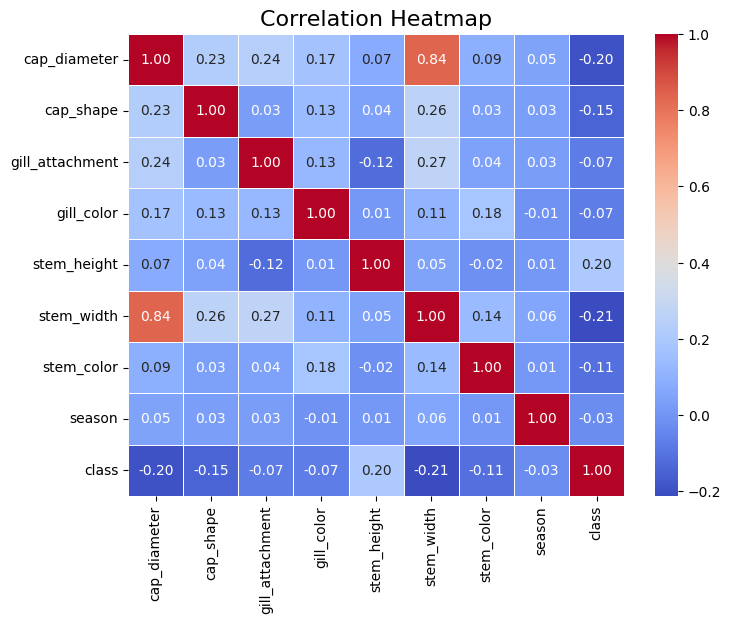

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Describe

In [15]:
df.describe()

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
count,44464.000000,44464.000000,44464.000000,44464.00000,44464.000000,44464.00000,44464.000000,44464.000000,44464.000000
mean,536.417686,4.068572,2.189097,7.44427,0.675028,980.95457,8.469391,0.919814,0.569449
std,327.267005,2.150971,2.261705,3.15458,0.508764,698.54281,3.282117,0.027080,0.495159
min,0.000000,0.000000,0.000000,0.00000,0.000426,0.00000,0.000000,0.888450,0.000000
25%,279.000000,2.000000,0.000000,5.00000,0.263039,406.00000,6.000000,0.888450,0.000000
50%,498.000000,5.000000,1.000000,8.00000,0.569421,860.00000,11.000000,0.943195,1.000000
75%,753.000000,6.000000,4.000000,10.00000,0.987215,1435.00000,11.000000,0.943195,1.000000
max,1520.000000,6.000000,6.000000,11.00000,2.199955,3081.00000,12.000000,0.943195,1.000000


### **Count Plot**

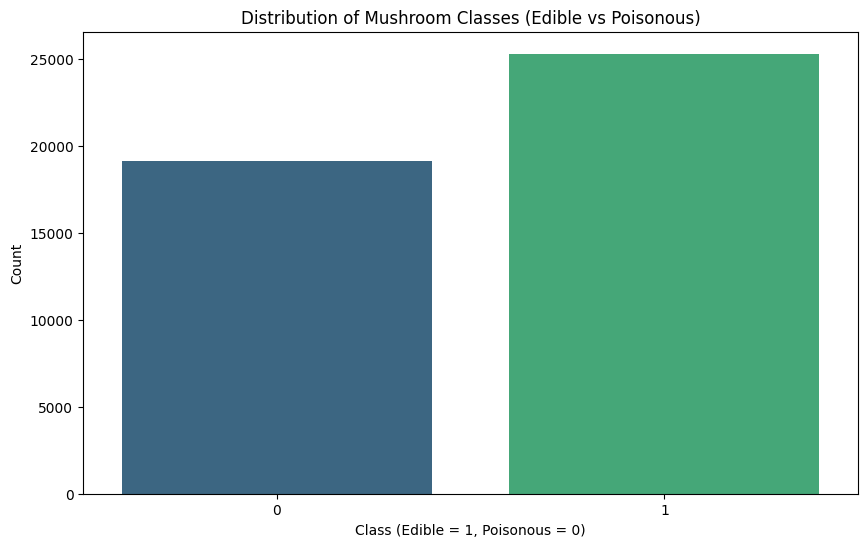

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution of Mushroom Classes (Edible vs Poisonous)')
plt.xlabel('Class (Edible = 1, Poisonous = 0)')
plt.ylabel('Count')
plt.show()

### **Histogram**

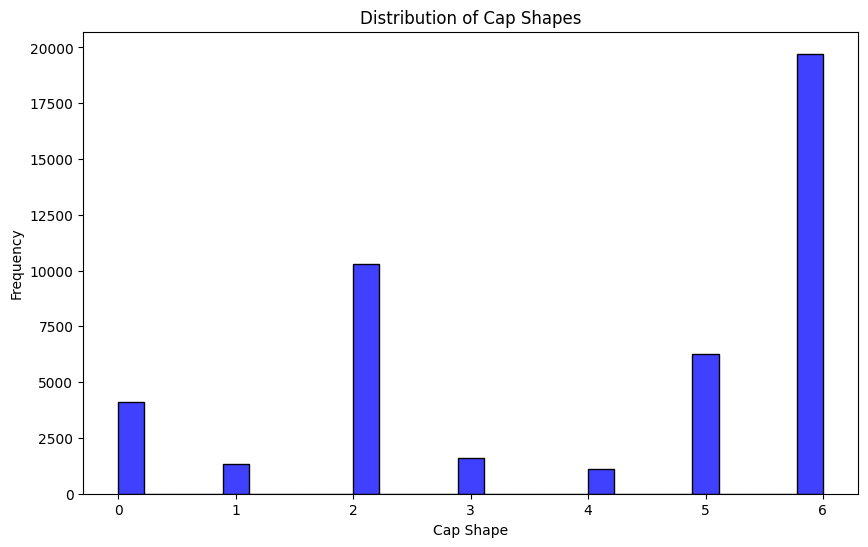

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cap_shape'], kde=False, color='blue')
plt.title('Distribution of Cap Shapes')
plt.xlabel('Cap Shape')
plt.ylabel('Frequency')
plt.show()

### **Pie Chart**

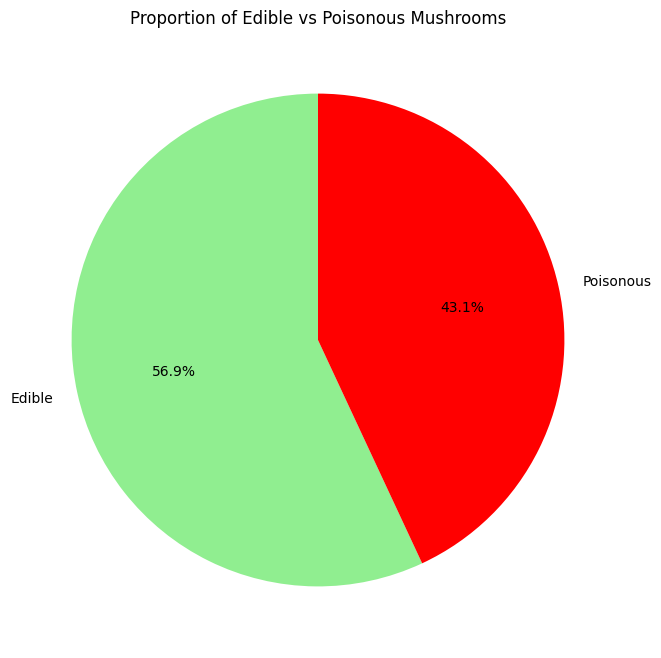

In [18]:
plt.figure(figsize=(8, 8))
class_counts = df['class'].value_counts()
plt.pie(class_counts, labels=['Edible', 'Poisonous'], autopct='%1.1f%%', colors=['lightgreen', 'red'], startangle=90)
plt.title('Proportion of Edible vs Poisonous Mushrooms')
plt.show()

### **Line Chart**

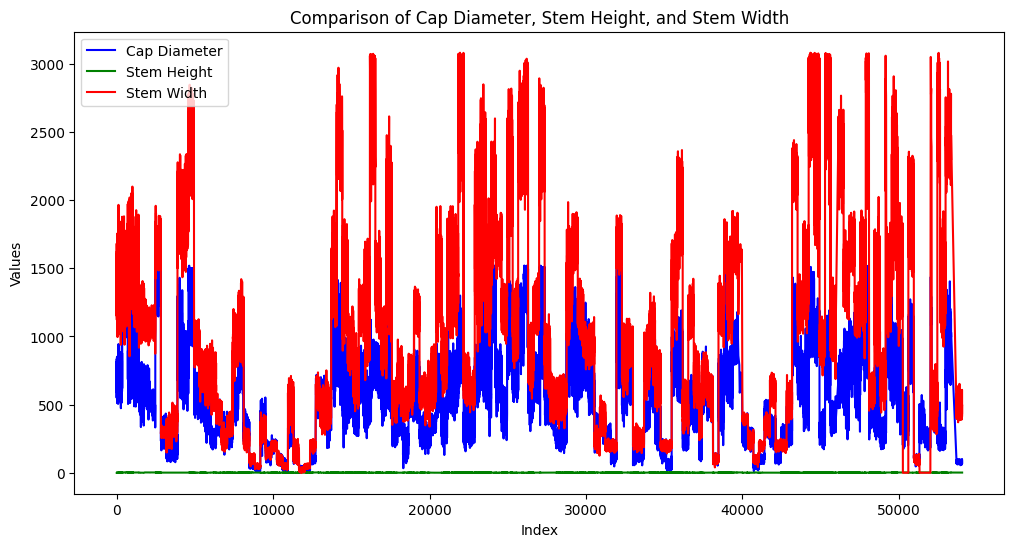

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cap_diameter'], label='Cap Diameter', color='blue')
plt.plot(df.index, df['stem_height'], label='Stem Height', color='green')
plt.plot(df.index, df['stem_width'], label='Stem Width', color='red')

plt.title('Comparison of Cap Diameter, Stem Height, and Stem Width')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

### **Selecting x and y**

In [20]:
x = df.drop('class', axis=1)

In [21]:
x.head()

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season
11,642,6,2,10,0.286062,1311,11,0.943195
12,814,4,2,10,1.189292,1681,11,0.943195
13,550,4,2,10,0.548675,1220,11,0.888450
14,606,6,2,10,0.254230,1239,11,0.943195
15,721,6,2,10,0.950553,1445,11,0.943195


In [22]:
scaler = StandardScaler()

In [23]:
x = scaler.fit_transform(x)

In [24]:
x = pd.DataFrame(x, columns=df.drop('class', axis=1).columns)

In [25]:
x.head()

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season
0,0.322622,0.897943,-0.083609,0.810174,-0.764542,0.472482,0.771038,0.863404
1,0.848193,-0.031880,-0.083609,0.810174,1.010821,1.002162,0.771038,0.863404
2,0.041503,-0.031880,-0.083609,0.810174,-0.248357,0.342210,0.771038,-1.158207
3,0.212619,0.897943,-0.083609,0.810174,-0.827109,0.369409,0.771038,0.863404
4,0.564018,0.897943,-0.083609,0.810174,0.541562,0.664312,0.771038,0.863404


In [26]:
y = df['class']

In [27]:
y.head()

,class
11,1
12,1
13,1
14,1
15,1


### **Scatterplot**

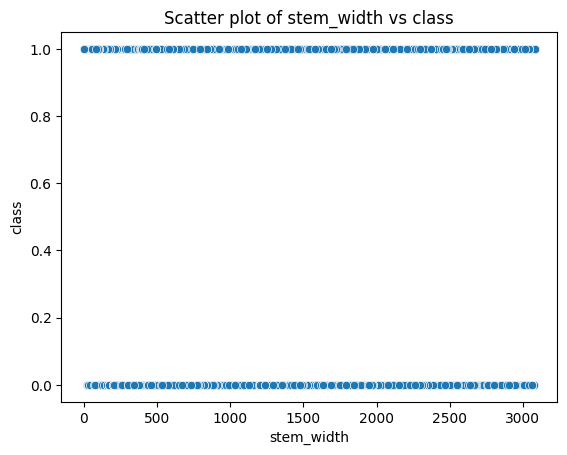

In [28]:
sns.scatterplot(df,x=df['stem_width'], y=y)
plt.xlabel('stem_width')
plt.ylabel('class')
plt.title(f'Scatter plot of stem_width vs class')
plt.show()

### **Train Test Splitting**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Classifying Mushroom edibility using KNN Classification**

In [30]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### **Checking Accuracy**

KNN Accuracy: 0.9844821769931407
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3827
           1       0.98      0.99      0.99      5066

    accuracy                           0.98      8893
   macro avg       0.98      0.98      0.98      8893
weighted avg       0.98      0.98      0.98      8893



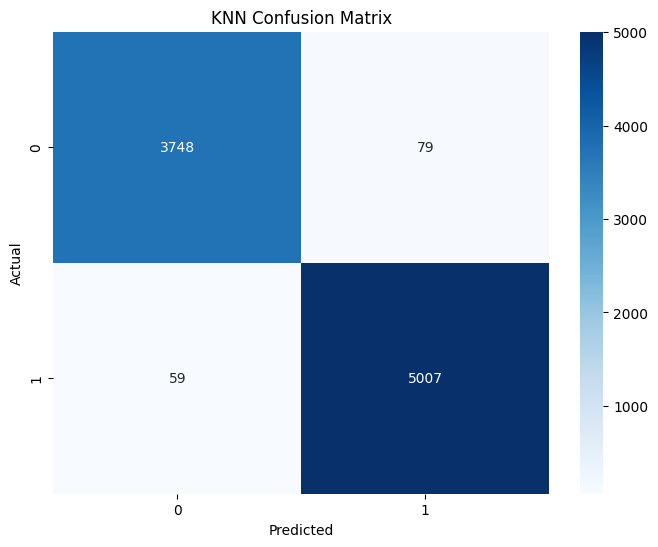

In [31]:
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy_knn}")

print(classification_report(y_test, y_pred))

cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

##  **Summary**

1. **Objective:**  
   - Classify mushrooms as **edible or poisonous** using various attributes through **K-Nearest Neighbors (KNN) classification**.

2. **Data Loading & Preparation:**  
   - The dataset is imported and columns are renamed by replacing hyphens (`-`) with underscores (`_`).
   - Duplicates are removed.
   - Outliers are removed using the **InterQuartile Range (IQR) method**.

3. **Exploratory Data Analysis (EDA):**  
   - Boxplots for numerical columns.
   - Covariance and Correlation calculations.
   - Heatmap to visualize feature correlations.
   - Count plots, histograms, pie charts, and line charts to understand feature distributions.

4. **Feature Scaling:**  
   - The features are scaled using **StandardScaler** to normalize the data.

5. **Train-Test Split:**  
   - Data is split into **training (80%) and testing (20%) sets**.

6. **KNN Model Training:**  
   - A **KNeighborsClassifier** is created with `n_neighbors=5`.
   - The model is trained using the training dataset.

7. **Model Evaluation:**  
   - **Accuracy Score:** Displayed after prediction.
   - **Classification Report:** Includes precision, recall, f1-score, and support.
   - **Confusion Matrix:** Visualized using a heatmap.

